In [1]:
from astropy.table import Table, column
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

import sys
sys.path.append('../astro_codes/')
from luminosities_magnitudes_and_distances import mag_to_Mag

11285/11507 good GAMA galaxies


/home/ppxrh/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()


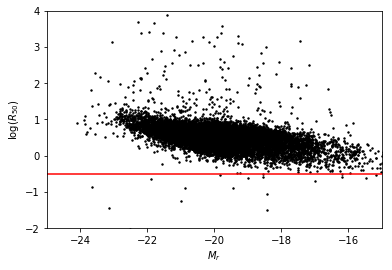

In [2]:
data = Table.read('GAMA_fits/gama09.fits')

_ = plt.scatter(data['absmag_r'],np.log10(data['GALRE_r_kpc']),s=2,color='k')
_ = plt.axhline(-0.5,color='r')
_ = plt.axis((-25,-15,-2,4))
_ = plt.xlabel('$M_r$')
_ = plt.ylabel('$\log(R_\mathrm{50})$')
# only keep galaxies with reasonable sizes: logR50 > 10^{-0.5}

gama_ok = np.all([data['absmag_r'] > -99,data['GALRE_r_kpc'] > 10**(-0.5),
                  data['GALRE_r_kpc'] < 10**(1.25)],
                axis=0)

print('{}/{} good GAMA galaxies'.format(gama_ok.sum(),len(gama_ok)))
data_ok = data[gama_ok]

M_r (limit) = -18.915185519784764


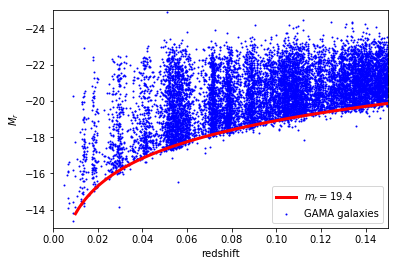

In [4]:
zs = np.linspace(0.01,0.15,100)
Mags = mag_to_Mag(19.4,zs)

_ = plt.scatter(data_ok['Z_TONRY'],data_ok['absmag_r_stars'],color='b',s=1,
                label='GAMA galaxies')
_ = plt.plot(zs,Mags,color='r',label='$m_r=19.4$',lw=3)
_ = plt.xlabel('redshift')
_ = plt.ylabel('$M_r$')
_ = plt.legend(loc='lower right')

Mag_limit = mag_to_Mag(19.4,0.1)
print('M_r (limit) = {}'.format(Mag_limit))

_ = plt.axis((0,0.15,-13,-25))

In [6]:
import dictionaries

question_dictionary = dictionaries.questions

for question in question_dictionary.keys():
    answers = question_dictionary[question]['answers']
    for answer in answers:
        frac_column = data_ok[question+'_'+answer]/data_ok[question+'_total']
        frac_column[(frac_column > 1) | (frac_column < 0)] = 0
        data_ok[question+'_'+answer+'_fraction'] = frac_column

In [8]:
data_ok.write('GAMA_fits/gama09_less.fits',overwrite=True)